<a href="https://colab.research.google.com/github/NitinNivin/Hackathon_Hyperverge/blob/main/Facedetectionipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


!unzip train.zip

Archive:  train.zip
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Happy/i

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model # Functional API
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False ) # weights
[ ]
for layer in base_model.layers: # To prevent retraining of the model!
  layer.trainable = False # every layer trainablety is false
x = Flatten() (base_model.output)
x = Dense (units=7, activation='softmax' )(x)
# creating our model.
model =Model (base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
[ ] # all the layers of
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(optimizer='adam', loss= "categorical_crossentropy" ,metrics=['accuracy'] )

In [ ]:
train_datagen = ImageDataGenerator(
zoom_range = 0.2,
shear_range = 0.2,
horizontal_flip=True,
rescale = 1./255
)
train_data = train_datagen.flow_from_directory(directory= "/content/train",
target_size=(224,224),
batch_size=32,
)
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator (rescale = 1/255)
val_data = val_datagen.flow_from_directory(directory="/content/train",
target_size=(224,224),
batch_size=32,
)

Found 350 images belonging to 7 classes.


In [ ]:
# to visualize the images in the traing
t_img , label =train_data.next()
# function when called will prot the
def plotImages (img_arr, label):

  count = 0
  for im, l in zip (img_arr, label):
      plt.imshow(im)
      plt.title(im.shape)
      plt.axis =False
      plt.show()
      count + 1
      if count == 10:
        break

In [ ]:
## having early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping
# early stopping
es = EarlyStopping (monitor = 'val_accuracy', min_delta = 0.01, patience= 5, verbose= 1, mode='auto')
# model check point
mc = ModelCheckpoint (filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')
#puting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=8,
                           callbacks=[es, mc])


<ipython-input-36-88b834e1f3fa>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 13.7263 - accuracy: 0.1792
Epoch 1: val_accuracy improved from -inf to 0.42969, saving model to best_model.h5
10/10 [==============================] - 32s 3s/step - loss: 13.7263 - accuracy: 0.1792 - val_loss: 6.4317 - val_accuracy: 0.4297


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.4720 - accuracy: 0.5031
Epoch 2: val_accuracy improved from 0.42969 to 0.57812, saving model to best_model.h5
10/10 [==============================] - 26s 3s/step - loss: 5.4720 - accuracy: 0.5031 - val_loss: 2.9998 - val_accuracy: 0.5781
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.1245 - accuracy: 0.7094
Epoch 3: val_accuracy improved from 0.57812 to 0.79297, saving model to best_model.h5
10/10 [==============================] - 27s 3s/step - loss: 2.1245 - accuracy: 0.7094 - val_loss: 1.2870 - val_accuracy: 0.7930
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.2322 - accuracy: 0.7956
Epoch 4: val_accuracy improved from 0.79297 to 0.88281, saving model to best_model.h5
10/10 [==============================] - 26s 3s/step - loss: 1.2322 - accuracy: 0.7956 - val_loss: 0.6860 - val_accuracy: 0.8828
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.604

In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
[ ]
h= hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

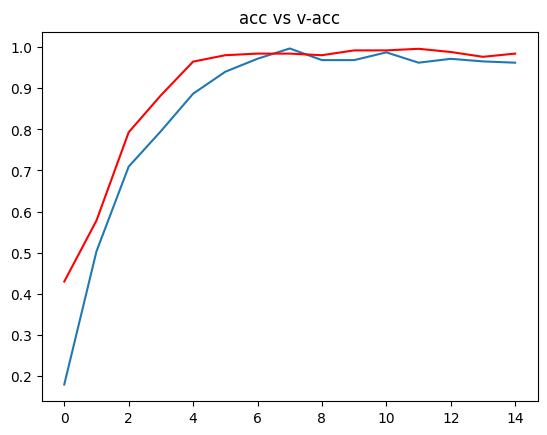

In [ ]:
[ ]
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

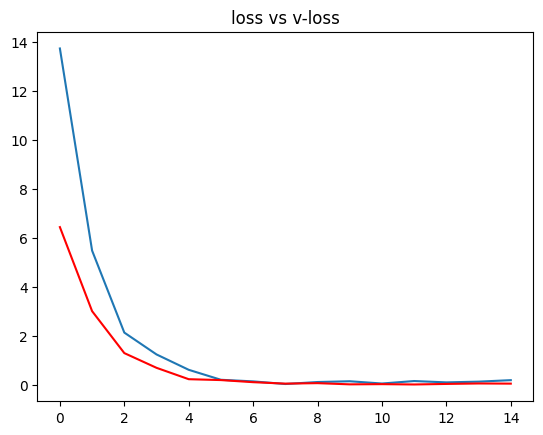

In [ ]:
[ ]
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
[ ] # just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 74ms/step
 the image is of Angry


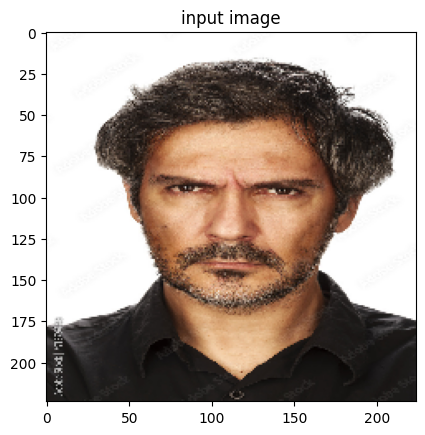

In [ ]:
[ ] # path for the image to see if it predics correct class
path = "/content/1000_F_71376448_hMwLKGITgJjCfJIXPQ8XrZSv9RgsGBIn.jpg" ## add the image path
img = load_img(path, target_size=(224,224))
i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape
pred = np.argmax(model.predict(input_arr))
print(f" the image is of {op[pred]}")
# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()